In [1]:
import numpy as np
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at : {}'.format(device_name))
import os

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets
from tensorflow.keras import layers

Found GPU at : /device:GPU:0


# Prepare Dataset


In [2]:
(train_x, train_y), (test_x, test_y) = datasets.cifar10.load_data()

In [3]:
train_x[0].shape

(32, 32, 3)

# Build Model


In [4]:
input_shape = (32, 32, 3)
num_classes = 10

In [5]:
inputs = layers.Input(shape=input_shape)
net = layers.Conv2D(16, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)

net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.4)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='quest')

In [6]:
model.summary()

Model: "quest"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0     

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# Prepare Data for Evaluating


In [8]:
train_x.shape, train_y.shape

((50000, 32, 32, 3), (50000, 1))

In [9]:
test_x.shape, test_y.shape

((10000, 32, 32, 3), (10000, 1))

차원 수 늘리기

In [10]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

In [11]:
train_x.shape

(50000, 32, 32, 3, 1)

In [12]:
test_x.shape

(10000, 32, 32, 3, 1)

Rescaling

In [13]:
np.min(train_x), np.max(train_x)

(0, 255)

In [14]:
train_x = train_x / 255.
test_x = test_x / 255.

np.min(train_x), np.max(train_x)

(0.0, 1.0)

# Training  

In [15]:
num_epochs = 100
batch_size = 256

In [16]:
hist = model.fit(train_x, train_y, 
                 batch_size=batch_size, 
                 shuffle=True, 
                 epochs=num_epochs) 

Epoch 1/100
196/196 [==============================] - 1s 7ms/step - loss: 1.8062 - accuracy: 0.3342
Epoch 2/100
196/196 [==============================] - 1s 6ms/step - loss: 1.4886 - accuracy: 0.4590
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 1.3474 - accuracy: 0.5178
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 1.2483 - accuracy: 0.5539
Epoch 5/100
196/196 [==============================] - 1s 6ms/step - loss: 1.1752 - accuracy: 0.5787
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 1.1100 - accuracy: 0.6049
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 1.0564 - accuracy: 0.6249
Epoch 8/100
196/196 [==============================] - 1s 6ms/step - loss: 1.0155 - accuracy: 0.6385
Epoch 9/100
196/196 [==============================] - 1s 6ms/step - loss: 0.9789 - accuracy: 0.6528
Epoch 10/100
196/196 [==============================] - 1s 7ms/step - loss: 0.9451 - accura

In [17]:
hist.history

{'accuracy': [0.334199994802475,
  0.4590199887752533,
  0.5178200006484985,
  0.5539199709892273,
  0.5787000060081482,
  0.6049399971961975,
  0.6249399781227112,
  0.638480007648468,
  0.6527799963951111,
  0.6664199829101562,
  0.676580011844635,
  0.685920000076294,
  0.6949800252914429,
  0.7040799856185913,
  0.7099199891090393,
  0.7153199911117554,
  0.7235000133514404,
  0.7285599708557129,
  0.7338799834251404,
  0.7360799908638,
  0.7430400252342224,
  0.7484999895095825,
  0.752560019493103,
  0.7569000124931335,
  0.7599599957466125,
  0.7631000280380249,
  0.7703400254249573,
  0.7710000276565552,
  0.7756800055503845,
  0.777180016040802,
  0.7785800099372864,
  0.7841399908065796,
  0.7874000072479248,
  0.7884200215339661,
  0.7913200259208679,
  0.7933800220489502,
  0.7944200038909912,
  0.7983400225639343,
  0.8006600141525269,
  0.8024399876594543,
  0.8039799928665161,
  0.8064799904823303,
  0.8060600161552429,
  0.8097400069236755,
  0.8139399886131287,
  0.813

# Evaluating 

In [18]:
model.evaluate(test_x, test_y, batch_size=batch_size)

40/40 [==============================] - 0s 4ms/step - loss: 0.7344 - accuracy: 0.7827


[0.7344499826431274, 0.7827000021934509]

In [19]:
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [20]:
test_image = test_x[0, :, :, :,0]
test_image.shape

(32, 32, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


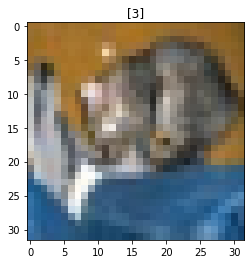

In [21]:
plt.title(test_y[0])
plt.imshow(test_image)
plt.show()

In [22]:
pred = model.predict(test_image.reshape(1, 32, 32, 3, 1))

In [23]:
pred.shape

(1, 10)

In [24]:
pred

array([[6.1189319e-04, 2.9658065e-06, 4.7582580e-06, 7.9250407e-01,
        1.5455973e-05, 2.0666586e-01, 3.1546184e-05, 6.0112284e-06,
        3.5604637e-05, 1.2186711e-04]], dtype=float32)

In [25]:
np.argmax(pred)

3